# Pandas DataFrame

## Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Create DataFrame

In [3]:
# help(pd)

In [5]:
# dir(pd)

In [7]:
# help(pd.DataFrame)

In [17]:
df = pd.DataFrame(
    data=[[1, 2, 3, 4, 5], [-2, 0, 4, -6, 3]],
    columns=pd.Index(
        data=list("abcde"),
        name="variables",
    ),
    index=pd.Index(data=["x", "y"], name="index"),
)
print(df)

variables  a  b  c  d  e
index                   
x          1  2  3  4  5
y         -2  0  4 -6  3


In [13]:
df.columns

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [18]:
# help(pd.Index)

In [19]:
df = pd.DataFrame(
    data=[
        ["Michael", "Male", 35, "Lecturer"],
        ["Lucy", "Female", 25, "Accountant"],
        ["Smith", "Male", 32, "Driver"],
        ["Andrea", "Female", 22, "Engineer"],
        ["Jane", "Female", 20, "Designer"],
    ]
)
print(df)

         0       1   2           3
0  Michael    Male  35    Lecturer
1     Lucy  Female  25  Accountant
2    Smith    Male  32      Driver
3   Andrea  Female  22    Engineer
4     Jane  Female  20    Designer


In [20]:
df = pd.DataFrame(
    data=np.array(
        object=[
            ["Michael", "Male", 35, "Lecturer"],
            ["Lucy", "Female", 25, "Accountant"],
            ["Smith", "Male", 32, "Driver"],
            ["Andrea", "Female", 22, "Engineer"],
            ["Jane", "Female", 20, "Designer"],
        ]
    ),
    columns=pd.Index(
        name="Field",
        data=["Name", "Gender", "Age", "Job"],
    ),
    index=pd.Index(
        name="ID",
        data=["DA03", "DA06", "DA17", "DA12", "DA09"],
    ),
)
print(df)

Field     Name  Gender Age         Job
ID                                    
DA03   Michael    Male  35    Lecturer
DA06      Lucy  Female  25  Accountant
DA17     Smith    Male  32      Driver
DA12    Andrea  Female  22    Engineer
DA09      Jane  Female  20    Designer


## Access Elements

In [22]:
df.loc["DA03", "Name"]

'Michael'

In [23]:
df.iloc[0, 0]

'Michael'

### Access First Row?

In [24]:
df.loc["DA03", :]

Field
Name       Michael
Gender        Male
Age             35
Job       Lecturer
Name: DA03, dtype: object

In [26]:
type(df.loc["DA03", :])

pandas.core.series.Series

In [25]:
df.loc[["DA03"], :]

Field,Name,Gender,Age,Job
ID,,,,
DA03,Michael,Male,35,Lecturer


In [27]:
type(df.loc[["DA03"], :])

pandas.core.frame.DataFrame

In [28]:
df

Field,Name,Gender,Age,Job
ID,,,,
DA03,Michael,Male,35,Lecturer
DA06,Lucy,Female,25,Accountant
DA17,Smith,Male,32,Driver
DA12,Andrea,Female,22,Engineer
DA09,Jane,Female,20,Designer


### Slice First and Third Row?

In [29]:
df.loc[["DA03", "DA17"], :]

Field,Name,Gender,Age,Job
ID,,,,
DA03,Michael,Male,35,Lecturer
DA17,Smith,Male,32,Driver


### Access Column "Age"?

In [31]:
df.loc[:, ["Age"]]

Field,Age
ID,
DA03,35
DA06,25
DA17,32
DA12,22
DA09,20


In [34]:
df.loc[["DA03"]]

Field,Name,Gender,Age,Job
ID,,,,
DA03,Michael,Male,35,Lecturer


In [36]:
df[["Age"]]

Field,Age
ID,
DA03,35
DA06,25
DA17,32
DA12,22
DA09,20


## Modify Elements

In [37]:
df = pd.DataFrame(
    data=np.array(
        object=[
            ["Michael", "Male", 35, "Lecturer"],
            ["Lucy", "Female", 25, "Accountant"],
            ["Smith", "Male", 32, "Driver"],
            ["Andrea", "Female", 22, "Engineer"],
            ["Jane", "Female", 20, "Designer"],
        ]
    ),
    columns=pd.Index(
        name="Field",
        data=["Name", "Gender", "Age", "Job"],
    ),
    index=pd.Index(
        name="ID",
        data=["DA03", "DA06", "DA17", "DA12", "DA09"],
    ),
)
print(df)

Field     Name  Gender Age         Job
ID                                    
DA03   Michael    Male  35    Lecturer
DA06      Lucy  Female  25  Accountant
DA17     Smith    Male  32      Driver
DA12    Andrea  Female  22    Engineer
DA09      Jane  Female  20    Designer


In [42]:
df.columns.name = "Variables"

In [43]:
df

Variables,Name,Gender,Age,Job
ID,,,,
DA03,Michael,Male,35,Lecturer
DA06,Lucy,Female,25,Accountant
DA17,Smith,Male,32,Driver
DA12,Andrea,Female,22,Engineer
DA09,Jane,Female,20,Designer


In [46]:
df.index.name = "Index"

In [47]:
df

Variables,Name,Gender,Age,Job
Index,,,,
DA03,Michael,Male,35,Lecturer
DA06,Lucy,Female,25,Accountant
DA17,Smith,Male,32,Driver
DA12,Andrea,Female,22,Engineer
DA09,Jane,Female,20,Designer


In [50]:
df.rename(mapper={"Gender": "Sex"}, axis=1, inplace=True)

In [51]:
df

Variables,Name,Sex,Age,Job
Index,,,,
DA03,Michael,Male,35,Lecturer
DA06,Lucy,Female,25,Accountant
DA17,Smith,Male,32,Driver
DA12,Andrea,Female,22,Engineer
DA09,Jane,Female,20,Designer


### Rename "DA12" to "DA02"?

In [53]:
df.rename(mapper={"DA12": "DA02"}, axis="index", inplace=True)

In [54]:
df

Variables,Name,Sex,Age,Job
Index,,,,
DA03,Michael,Male,35,Lecturer
DA06,Lucy,Female,25,Accountant
DA17,Smith,Male,32,Driver
DA02,Andrea,Female,22,Engineer
DA09,Jane,Female,20,Designer


### Change Age of Michael to "36"?

In [57]:
df.loc["DA03", "Age"] = 36
df

Variables,Name,Sex,Age,Job
Index,,,,
DA03,Michael,Male,36,Lecturer
DA06,Lucy,Female,25,Accountant
DA17,Smith,Male,32,Driver
DA02,Andrea,Female,22,Engineer
DA09,Jane,Female,20,Designer


## Add/Remove Row/Column

In [58]:
df.loc["DA10"] = ["Say", "Male", 37, "Lecturer"]
df

Variables,Name,Sex,Age,Job
Index,,,,
DA03,Michael,Male,36,Lecturer
DA06,Lucy,Female,25,Accountant
DA17,Smith,Male,32,Driver
DA02,Andrea,Female,22,Engineer
DA09,Jane,Female,20,Designer
DA10,Say,Male,37,Lecturer


In [62]:
df.drop(labels="DA10", axis=0, inplace=True)

In [63]:
df

Variables,Name,Sex,Age,Job
Index,,,,
DA03,Michael,Male,36,Lecturer
DA06,Lucy,Female,25,Accountant
DA17,Smith,Male,32,Driver
DA02,Andrea,Female,22,Engineer
DA09,Jane,Female,20,Designer


In [64]:
df["Score"] = [6, 5, 8, 0, 9]

In [65]:
df

Variables,Name,Sex,Age,Job,Score
Index,,,,,
DA03,Michael,Male,36,Lecturer,6
DA06,Lucy,Female,25,Accountant,5
DA17,Smith,Male,32,Driver,8
DA02,Andrea,Female,22,Engineer,0
DA09,Jane,Female,20,Designer,9


### Drop Column "Score"?

In [66]:
df = df.drop(labels=["Score"], axis="columns")

In [67]:
df

Variables,Name,Sex,Age,Job
Index,,,,
DA03,Michael,Male,36,Lecturer
DA06,Lucy,Female,25,Accountant
DA17,Smith,Male,32,Driver
DA02,Andrea,Female,22,Engineer
DA09,Jane,Female,20,Designer


In [69]:
df["Score"] = [6, 5, 8, 0, 9]
df

Variables,Name,Sex,Age,Job,Score
Index,,,,,
DA03,Michael,Male,36,Lecturer,6
DA06,Lucy,Female,25,Accountant,5
DA17,Smith,Male,32,Driver,8
DA02,Andrea,Female,22,Engineer,0
DA09,Jane,Female,20,Designer,9


In [74]:
# df.drop(labels=4, axis=1, inplace=True) # Error

## Transformation

In [119]:
df = pd.DataFrame(
    data=np.array(
        object=[
            ["Michael", "Male", 35, "Lecturer"],
            ["Lucy", "Female", 25, "Accountant"],
            ["Smith", "Male", 32, "Driver"],
            ["Andrea", "Female", 22, "Engineer"],
            ["Jane", "Female", 20, "Designer"],
        ]
    ),
    columns=pd.Index(
        name="Field",
        data=["Name", "Gender", "Age", "Job"],
    ),
    index=pd.Index(
        name="ID",
        data=["DA03", "DA06", "DA17", "DA12", "DA09"],
    ),
)
print(df)

Field     Name  Gender Age         Job
ID                                    
DA03   Michael    Male  35    Lecturer
DA06      Lucy  Female  25  Accountant
DA17     Smith    Male  32      Driver
DA12    Andrea  Female  22    Engineer
DA09      Jane  Female  20    Designer


In [79]:
df.sort_values(by=["Name"])

Field,Name,Gender,Age,Job
ID,,,,
DA12,Andrea,Female,22,Engineer
DA09,Jane,Female,20,Designer
DA06,Lucy,Female,25,Accountant
DA03,Michael,Male,35,Lecturer
DA17,Smith,Male,32,Driver


In [83]:
df.sort_values(by=["Gender", "Age"], ascending=[False, True])

Field,Name,Gender,Age,Job
ID,,,,
DA17,Smith,Male,32,Driver
DA03,Michael,Male,35,Lecturer
DA09,Jane,Female,20,Designer
DA12,Andrea,Female,22,Engineer
DA06,Lucy,Female,25,Accountant


In [90]:
df.sort_index(axis=0,ascending=False)

Field,Name,Gender,Age,Job
ID,,,,
DA17,Smith,Male,32,Driver
DA12,Andrea,Female,22,Engineer
DA09,Jane,Female,20,Designer
DA06,Lucy,Female,25,Accountant
DA03,Michael,Male,35,Lecturer


In [92]:
df.sort_index().sort_index(axis="columns")

Field,Age,Gender,Job,Name
ID,,,,
DA03,35,Male,Lecturer,Michael
DA06,25,Female,Accountant,Lucy
DA09,20,Female,Designer,Jane
DA12,22,Female,Engineer,Andrea
DA17,32,Male,Driver,Smith


In [93]:
# help(df.sort_index)

In [94]:
df.shape

(5, 4)

In [95]:
df.dtypes

Field
Name      object
Gender    object
Age       object
Job       object
dtype: object

In [98]:
df["Age"] = df["Age"].astype(dtype=np.int64)

In [99]:
df.dtypes

Field
Name      object
Gender    object
Age        int64
Job       object
dtype: object

In [104]:
df["Age"]=df["Age"].astype(dtype=object)
df.dtypes

Field
Name      object
Gender    object
Age       object
Job       object
dtype: object

In [105]:
df["Age"]=pd.to_numeric(arg=df["Age"])
df.dtypes

Field
Name      object
Gender    object
Age        int64
Job       object
dtype: object

In [107]:
df["Gender"]=pd.Categorical(values=df["Gender"])
df.dtypes

Field
Name        object
Gender    category
Age          int64
Job         object
dtype: object

In [112]:
df.select_dtypes(include="object").columns

Index(['Name', 'Job'], dtype='object', name='Field')

In [113]:
for col in df.select_dtypes(include="object").columns:
    df[col]=pd.Categorical(values=df[col])

In [114]:
df.dtypes

Field
Name      category
Gender    category
Age          int64
Job       category
dtype: object

In [116]:
df.select_dtypes(include=["number", "category"])

Field,Name,Gender,Age,Job
ID,,,,
DA03,Michael,Male,35,Lecturer
DA06,Lucy,Female,25,Accountant
DA17,Smith,Male,32,Driver
DA12,Andrea,Female,22,Engineer
DA09,Jane,Female,20,Designer


In [120]:
df_new = df.copy()

In [121]:
df_new

Field,Name,Gender,Age,Job
ID,,,,
DA03,Michael,Male,35,Lecturer
DA06,Lucy,Female,25,Accountant
DA17,Smith,Male,32,Driver
DA12,Andrea,Female,22,Engineer
DA09,Jane,Female,20,Designer


In [122]:
def encode_gender(gender: str)->int:
    if gender=="Female":
        encode=0
    else:
        encode=1
    return encode

In [125]:
df_new["Gender"]=df["Gender"].apply(func=encode_gender)
df_new

Field,Name,Gender,Age,Job
ID,,,,
DA03,Michael,1,35,Lecturer
DA06,Lucy,0,25,Accountant
DA17,Smith,1,32,Driver
DA12,Andrea,0,22,Engineer
DA09,Jane,0,20,Designer


In [128]:
new_gender_features = pd.get_dummies(data=df["Gender"]).astype(dtype=int)
new_gender_features

,Female,Male
ID,,
DA03,0,1
DA06,1,0
DA17,0,1
DA12,1,0
DA09,1,0


In [129]:
df_new = pd.concat(objs=[df_new,new_gender_features],axis=1)
df_new

,Name,Gender,Age,Job,Female,Male
ID,,,,,,
DA03,Michael,1,35,Lecturer,0,1
DA06,Lucy,0,25,Accountant,1,0
DA17,Smith,1,32,Driver,0,1
DA12,Andrea,0,22,Engineer,1,0
DA09,Jane,0,20,Designer,1,0


In [130]:
pd.get_dummies(data=df)

,Name_Andrea,Name_Jane,Name_Lucy,Name_Michael,Name_Smith,Gender_Female,Gender_Male,Age_20,Age_22,Age_25,Age_32,Age_35,Job_Accountant,Job_Designer,Job_Driver,Job_Engineer,Job_Lecturer
ID,,,,,,,,,,,,,,,,,
DA03,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,True
DA06,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,False,False
DA17,False,False,False,False,True,False,True,False,False,False,True,False,False,False,True,False,False
DA12,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False
DA09,False,True,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False


In [131]:
df

Field,Name,Gender,Age,Job
ID,,,,
DA03,Michael,Male,35,Lecturer
DA06,Lucy,Female,25,Accountant
DA17,Smith,Male,32,Driver
DA12,Andrea,Female,22,Engineer
DA09,Jane,Female,20,Designer


In [132]:
df2 = df.copy()
df2["Age"]=df["Age"].apply(func=lambda x: str(x)+" years old")
df2

Field,Name,Gender,Age,Job
ID,,,,
DA03,Michael,Male,35 years old,Lecturer
DA06,Lucy,Female,25 years old,Accountant
DA17,Smith,Male,32 years old,Driver
DA12,Andrea,Female,22 years old,Engineer
DA09,Jane,Female,20 years old,Designer


In [135]:
s = "25 years old"
int(s.split(sep=" ")[0])

25

In [137]:
def extract_age(s:str)->int:
    return int(s.split(sep=" ")[0])

In [139]:
# df2["Age"]=df2["Age"].apply(func=extract_age)

In [136]:
df2["Age"]=df2["Age"].apply(func=lambda s: int(s.split(sep=" ")[0]))
df2

Field,Name,Gender,Age,Job
ID,,,,
DA03,Michael,Male,35,Lecturer
DA06,Lucy,Female,25,Accountant
DA17,Smith,Male,32,Driver
DA12,Andrea,Female,22,Engineer
DA09,Jane,Female,20,Designer


## Aggregation

In [140]:
df = pd.DataFrame(
    index=pd.Index(
        name="Id",
        data=["DA03", "DA06", "DA17", "DA12", "DA09", "DA15", "DA01", "DA02"],
    ),
    data={
        "Name": [
            "Michael",
            "Lucy",
            "Smith",
            "Andrea",
            "Jane",
            "Peter",
            "John",
            "Rebeca",
        ],
        "Gender": [
            "Male",
            "Female",
            "Male",
            "Female",
            "Female",
            "Male",
            "Male",
            "Female",
        ],
        "Age": [31, 25, np.nan, 23, 24, 26, 27, 26],
        "Job": [
            "Lecturer",
            "Accountant",
            "Driver",
            "Engineer",
            "Designer",
            "Scientist",
            "Dentist",
            "Nurse",
        ],
        "Degree": [
            "Master",
            "Doctoral",
            "Bachelor",
            np.nan,
            "Master",
            np.nan,
            "Bachelor",
            "Bachelor",
        ],
        "Email": [
            "da03@domain.com",
            "da06@domain.com",
            "da17@domain.com",
            "da12@domain.com",
            "da09@domain.com",
            "da15@domain.com",
            np.nan,
            np.nan,
        ],
    },
)
print(df)

         Name  Gender   Age         Job    Degree            Email
Id                                                                
DA03  Michael    Male  31.0    Lecturer    Master  da03@domain.com
DA06     Lucy  Female  25.0  Accountant  Doctoral  da06@domain.com
DA17    Smith    Male   NaN      Driver  Bachelor  da17@domain.com
DA12   Andrea  Female  23.0    Engineer       NaN  da12@domain.com
DA09     Jane  Female  24.0    Designer    Master  da09@domain.com
DA15    Peter    Male  26.0   Scientist       NaN  da15@domain.com
DA01     John    Male  27.0     Dentist  Bachelor              NaN
DA02   Rebeca  Female  26.0       Nurse  Bachelor              NaN


In [143]:
# dir(df)

In [145]:
# help(df.agg)

In [147]:
df.agg(func="count")

Name      8
Gender    8
Age       7
Job       8
Degree    6
Email     6
dtype: int64

In [149]:
df.count()

Name      8
Gender    8
Age       7
Job       8
Degree    6
Email     6
dtype: int64

In [151]:
df.sum(numeric_only=True)

Age    182.0
dtype: float64

In [154]:
df.select_dtypes(include="number").sum()

Age    182.0
dtype: float64

In [152]:
df.agg(func="sum", numeric_only=True)

Age    182.0
dtype: float64

In [153]:
help(df.agg)

Help on method aggregate in module pandas.core.frame:

aggregate(func=None, axis: 'Axis' = 0, *args, **kwargs) method of pandas.core.frame.DataFrame instance
    Aggregate using one or more operations over the specified axis.
    
    Parameters
    ----------
    func : function, str, list or dict
        Function to use for aggregating the data. If a function, must either
        work when passed a DataFrame or when passed to DataFrame.apply.
    
        Accepted combinations are:
    
        - function
        - string function name
        - list of functions and/or function names, e.g. ``[np.sum, 'mean']``
        - dict of axis labels -> functions, function names or list of such.
    axis : {0 or 'index', 1 or 'columns'}, default 0
            If 0 or 'index': apply function to each column.
            If 1 or 'columns': apply function to each row.
    *args
        Positional arguments to pass to `func`.
    **kwargs
        Keyword arguments to pass to `func`.
    
    Return

In [157]:
# help(df.mean)

In [161]:
df[["Age"]].agg(func=["count", "sum", "mean"])

,Age
count,7.0
sum,182.0
mean,26.0


## Groupby Method

In [162]:
df = pd.DataFrame(
    index=pd.Index(
        name="Id",
        data=["DA03", "DA06", "DA17", "DA12", "DA09", "DA15", "DA01", "DA02"],
    ),
    data={
        "Name": [
            "Michael",
            "Lucy",
            "Smith",
            "Andrea",
            "Jane",
            "Peter",
            "John",
            "Rebeca",
        ],
        "Gender": [
            "Male",
            "Female",
            "Male",
            "Female",
            "Female",
            "Male",
            "Male",
            "Female",
        ],
        "Age": [31, 25, np.nan, 23, 24, 26, 27, 26],
        "Job": [
            "Lecturer",
            "Accountant",
            "Driver",
            "Engineer",
            "Designer",
            "Scientist",
            "Dentist",
            "Nurse",
        ],
        "Degree": [
            "Master",
            "Doctoral",
            "Bachelor",
            np.nan,
            "Master",
            np.nan,
            "Bachelor",
            "Bachelor",
        ],
        "Email": [
            "da03@domain.com",
            "da06@domain.com",
            "da17@domain.com",
            "da12@domain.com",
            "da09@domain.com",
            "da15@domain.com",
            np.nan,
            np.nan,
        ],
    },
)
print(df)

         Name  Gender   Age         Job    Degree            Email
Id                                                                
DA03  Michael    Male  31.0    Lecturer    Master  da03@domain.com
DA06     Lucy  Female  25.0  Accountant  Doctoral  da06@domain.com
DA17    Smith    Male   NaN      Driver  Bachelor  da17@domain.com
DA12   Andrea  Female  23.0    Engineer       NaN  da12@domain.com
DA09     Jane  Female  24.0    Designer    Master  da09@domain.com
DA15    Peter    Male  26.0   Scientist       NaN  da15@domain.com
DA01     John    Male  27.0     Dentist  Bachelor              NaN
DA02   Rebeca  Female  26.0       Nurse  Bachelor              NaN


In [164]:
gender_gp = df.groupby(by="Gender")

In [165]:
dir(gender_gp)

['Age',
 'Degree',
 'Email',
 'Gender',
 'Job',
 'Name',
 '_DataFrameGroupBy__examples_dataframe_doc',
 '__annotations__',
 '__class__',
 '__class_getitem__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_accessors',
 '_agg_examples_doc',
 '_agg_general',
 '_agg_py_fallback',
 '_aggregate_frame',
 '_aggregate_with_numba',
 '_apply_filter',
 '_apply_to_column_groupbys',
 '_ascending_count',
 '_bool_agg',
 '_choose_path',
 '_concat_objects',
 '_constructor',
 '_cumcount_array',
 '_cython_agg_general',
 '_cython_transform',
 '_define_paths',
 '_descending_co

In [166]:
gender_gp.get_group(name="Male")

,Name,Gender,Age,Job,Degree,Email
Id,,,,,,
DA03,Michael,Male,31.0,Lecturer,Master,da03@domain.com
DA17,Smith,Male,NaN,Driver,Bachelor,da17@domain.com
DA15,Peter,Male,26.0,Scientist,NaN,da15@domain.com
DA01,John,Male,27.0,Dentist,Bachelor,NaN


In [169]:
gender_gp.get_group(name="Female")

,Name,Gender,Age,Job,Degree,Email
Id,,,,,,
DA06,Lucy,Female,25.0,Accountant,Doctoral,da06@domain.com
DA12,Andrea,Female,23.0,Engineer,NaN,da12@domain.com
DA09,Jane,Female,24.0,Designer,Master,da09@domain.com
DA02,Rebeca,Female,26.0,Nurse,Bachelor,NaN


In [168]:
gender_gp.agg(func="mean", numeric_only=True)

,Age
Gender,
Female,24.5
Male,28.0


In [170]:
gender_gp.groups

{'Female': ['DA06', 'DA12', 'DA09', 'DA02'], 'Male': ['DA03', 'DA17', 'DA15', 'DA01']}

In [171]:
df.loc[['DA06', 'DA12', 'DA09', 'DA02']]

,Name,Gender,Age,Job,Degree,Email
Id,,,,,,
DA06,Lucy,Female,25.0,Accountant,Doctoral,da06@domain.com
DA12,Andrea,Female,23.0,Engineer,NaN,da12@domain.com
DA09,Jane,Female,24.0,Designer,Master,da09@domain.com
DA02,Rebeca,Female,26.0,Nurse,Bachelor,NaN


In [172]:
gender_gp.mean(numeric_only=True)

,Age
Gender,
Female,24.5
Male,28.0


## PivotTable

In [173]:
df = pd.DataFrame(
    index=pd.Index(
        name="Id",
        data=["DA03", "DA06", "DA17", "DA12", "DA09", "DA15", "DA01", "DA02"],
    ),
    data={
        "Name": [
            "Michael",
            "Lucy",
            "Smith",
            "Andrea",
            "Jane",
            "Peter",
            "John",
            "Rebeca",
        ],
        "Gender": [
            "Male",
            "Female",
            "Male",
            "Female",
            "Female",
            "Male",
            "Male",
            "Female",
        ],
        "Age": [31, 25, np.nan, 23, 24, 26, 27, 26],
        "Job": [
            "Lecturer",
            "Accountant",
            "Driver",
            "Engineer",
            "Designer",
            "Scientist",
            "Dentist",
            "Nurse",
        ],
        "Degree": [
            "Master",
            "Doctoral",
            "Bachelor",
            np.nan,
            "Master",
            np.nan,
            "Bachelor",
            "Bachelor",
        ],
        "Email": [
            "da03@domain.com",
            "da06@domain.com",
            "da17@domain.com",
            "da12@domain.com",
            "da09@domain.com",
            "da15@domain.com",
            np.nan,
            np.nan,
        ],
    },
)
print(df)

         Name  Gender   Age         Job    Degree            Email
Id                                                                
DA03  Michael    Male  31.0    Lecturer    Master  da03@domain.com
DA06     Lucy  Female  25.0  Accountant  Doctoral  da06@domain.com
DA17    Smith    Male   NaN      Driver  Bachelor  da17@domain.com
DA12   Andrea  Female  23.0    Engineer       NaN  da12@domain.com
DA09     Jane  Female  24.0    Designer    Master  da09@domain.com
DA15    Peter    Male  26.0   Scientist       NaN  da15@domain.com
DA01     John    Male  27.0     Dentist  Bachelor              NaN
DA02   Rebeca  Female  26.0       Nurse  Bachelor              NaN


In [174]:
df.pivot_table(
    index="Gender",
    columns="Degree",
    values="Age",
    aggfunc="mean",
)

Degree,Bachelor,Doctoral,Master
Gender,,,
Female,26.0,25.0,24.0
Male,27.0,NaN,31.0


In [177]:
df.groupby(by=["Gender","Degree"]).count()

Name  Age  Job  Email
Gender Degree                         
Female Bachelor     1    1    1      0
       Doctoral     1    1    1      1
       Master       1    1    1      1
Male   Bachelor     2    1    2      1
       Master       1    1    1      1

In [178]:
df.groupby(by=["Gender","Degree"]).get_group(name=("Male","Bachelor"))

,Name,Gender,Age,Job,Degree,Email
Id,,,,,,
DA17,Smith,Male,NaN,Driver,Bachelor,da17@domain.com
DA01,John,Male,27.0,Dentist,Bachelor,NaN


In [175]:
df.groupby(by=["Gender","Degree"]).mean(numeric_only=True)

Age
Gender Degree        
Female Bachelor  26.0
       Doctoral  25.0
       Master    24.0
Male   Bachelor  27.0
       Master    31.0

In [179]:
import seaborn as sns

In [180]:
p = sns.load_dataset("penguins")
p

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


<Axes: >

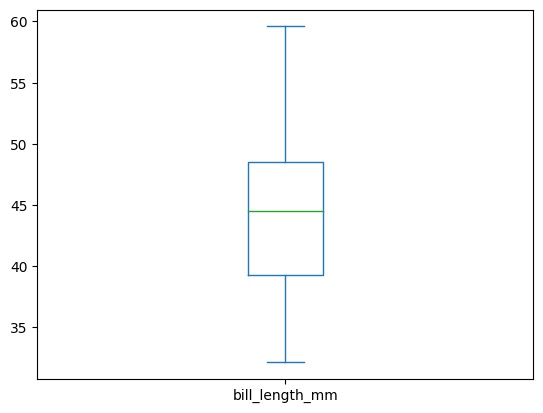

In [181]:
p["bill_length_mm"].plot(kind="box")

<Axes: >

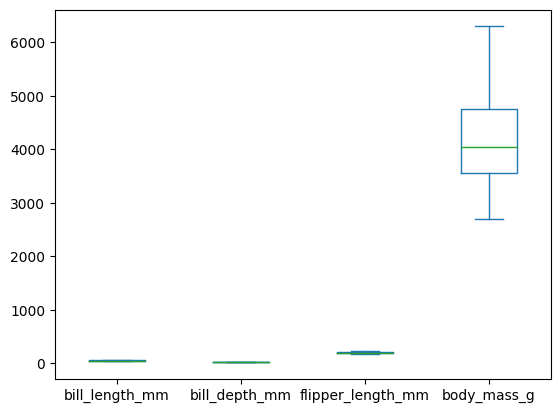

In [182]:
p.select_dtypes(include="number").plot(kind="box")

bill_length_mm          Axes(0.125,0.53;0.352273x0.35)
bill_depth_mm        Axes(0.547727,0.53;0.352273x0.35)
flipper_length_mm       Axes(0.125,0.11;0.352273x0.35)
body_mass_g          Axes(0.547727,0.11;0.352273x0.35)
dtype: object

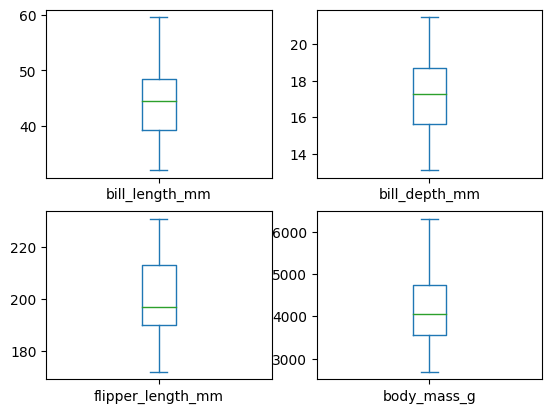

In [184]:
p.select_dtypes(include="number").plot(
    kind="box",
    subplots=True,
    layout=(2, 2),
)

In [185]:
help(pd.DataFrame.plot)

Help on class PlotAccessor in module pandas.plotting._core:

class PlotAccessor(pandas.core.base.PandasObject)
 |  PlotAccessor(data) -> 'None'
 |  
 |  Make plots of Series or DataFrame.
 |  
 |  Uses the backend specified by the
 |  option ``plotting.backend``. By default, matplotlib is used.
 |  
 |  Parameters
 |  ----------
 |  data : Series or DataFrame
 |      The object for which the method is called.
 |  x : label or position, default None
 |      Only used if data is a DataFrame.
 |  y : label, position or list of label, positions, default None
 |      Allows plotting of one column versus another. Only used if data is a
 |      DataFrame.
 |  kind : str
 |      The kind of plot to produce:
 |  
 |      - 'line' : line plot (default)
 |      - 'bar' : vertical bar plot
 |      - 'barh' : horizontal bar plot
 |      - 'hist' : histogram
 |      - 'box' : boxplot
 |      - 'kde' : Kernel Density Estimation plot
 |      - 'density' : same as 'kde'
 |      - 'area' : area plot
 | 